In [1]:
import sys
sys.path.insert(0, '../')
from fconcrete import e, Beam, Node, Loads, Nodes, Load,Material, ConcreteBeam, SingleBeamElement, Rectangle, Concrete, Section, ConcreteSteels
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=3, suppress=True, linewidth=3000)
#from math import log

# Tension in MPa
# length in cm
# Shear in kN

# Simplest Example

# Youtube teste   https://www.youtube.com/watch?v=Drelp5WNdgQ

In [32]:
#material = Material(E=1, poisson=0.3, alpha=1)
#section = Rectangle(12,1, material)

material = Material(E=2.17*10**6, poisson=0.3, alpha=1)
section = Rectangle(0.3,0.5, material)

f1 = Load.PontualLoad(-10, x=2.5)
f3 = Load.UniformDistributedLoad(-2, x_begin=11, x_end=15)

n1 = Node.SimpleSupport(x=0)
n2 = Node.MiddleNode(x=5)
n3 = Node.MiddleNode(x=11)
n4 = Node.SimpleSupport(x=15)

bar1 = SingleBeamElement([n1, n2], section)
bar2 = SingleBeamElement([n2, n3], section)
bar3 = SingleBeamElement([n3, n4], section)

beam = Beam(
    loads = [f1, f3],
    bars = [bar1, bar2, bar3]
)
self = beam

# Mateiral tese teste

In [6]:
material = Material(E=2.5*10**7, poisson=0.3, alpha=1)
section = Rectangle(0.4,0.6, material)
f1 = Load.PontualLoad(-1, x=5)
n1 = Node.Free(x=0)
n2 = Node.Free(x=10)
bar1 = SingleBeamElement([n1, n2], section)
beam = Beam(
    loads = [f1],
    bars = [bar1]
)
self = beam
self.solve()

In [3]:
self.length

10

In [5]:
condition_boundary = self.bars.condition_boundary
beams_efforts = self.get_beams_efforts()
matrix_rigidity_global = self.matrix_rigidity_global()

matrix_rigidity_global_determinable = matrix_rigidity_global[
    condition_boundary, :][:, condition_boundary]
beams_efforts_determinable = beams_efforts[condition_boundary]

U = np.zeros(len(condition_boundary))
U[condition_boundary] = np.linalg.solve(matrix_rigidity_global_determinable, beams_efforts_determinable)
#U[condition_boundary] = beams_efforts_determinable @ np.linalg.pinv(matrix_rigidity_global_determinable)

F = matrix_rigidity_global @ U
F

array([ 1.,  0., -1., -8.,  0.,  0.])

In [66]:
condition_boundary

array([ True,  True,  True,  True,  True,  True])

In [67]:
matrix_rigidity_global, U

(array([[ 17280.,  43200., -17280.,  43200.,      0.,      0.],
        [ 43200., 144000., -43200.,  72000.,      0.,      0.],
        [-17280., -43200.,  34560.,      0., -17280.,  43200.],
        [ 43200.,  72000.,      0., 288000., -43200.,  72000.],
        [     0.,      0., -17280., -43200.,  17280., -43200.],
        [     0.,      0.,  43200.,  72000., -43200., 144000.]]),
 array([-4.123e+11,  6.872e+10, -6.872e+10,  6.872e+10,  2.749e+11,  6.872e+10]))

In [68]:
matrix_rigidity_global @ U

array([ 1.,  0., -1., -8.,  0.,  0.])

In [69]:
beams_efforts, F, beams_efforts - F

(array([0., 0., 1., 0., 0., 0.]),
 array([ 1.,  0., -1., -8.,  0.,  0.]),
 array([-1.,  0.,  2.,  8.,  0.,  0.]))

In [72]:
self.getSupportReactions()

array([-1.,  0.,  2.,  8.,  0.,  0.])

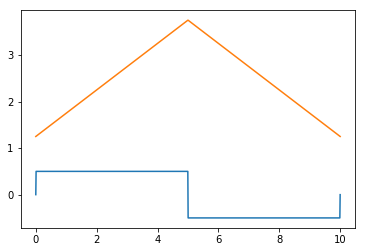

In [7]:
self.solve()
self.plotShearDiagram()
self.plotMomentumDiagram()

In [5]:
matrix_rigidity_global/(material.E*section.I)

array([[ 0.444,  0.667, -0.444,  0.667],
       [ 0.667,  1.333, -0.667,  0.667],
       [-0.444, -0.667,  0.444, -0.667],
       [ 0.667,  0.667, -0.667,  1.333]])

In [6]:
self.bars.bar_elements[0].get_matrix_rigidity_unitary()/(material.E*section.I)

array([[ 0.444,  0.667, -0.444,  0.667],
       [ 0.667,  1.333, -0.667,  0.667],
       [-0.444, -0.667,  0.444, -0.667],
       [ 0.667,  0.667, -0.667,  1.333]])

In [5]:
material = Material(E=2500, poisson=0.3, alpha=1)
section = Rectangle(40,60, material)

f1 = Load.UniformDistributedLoad(-8, x_begin=0, x_end=100)

n1 = Node.Crimp(x=0)
n2 = Node.SimpleSupport(x=100)

bar1 = SingleBeamElement([n1, n2], section)

beam = Beam(
    loads = [f1],
    bars = [bar1],
    steel= ConcreteSteels(diameters=[8])
)
beam.solve()

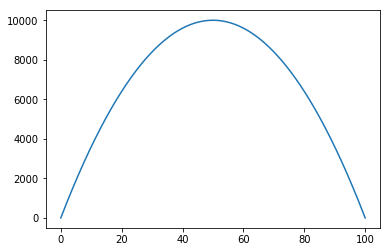

In [14]:
x, y = beam.getMomentumDiagram()
plt.plot(x, y)

In [3]:
beam.getSupportReactions()

0.0
299.99999
299.99999


array([ 0.00000000e+00,  0.00000000e+00,  7.57306469e-29, -2.27191941e-26])

In [11]:
material = Concrete(fck=30, aggressiveness=3)
section = Rectangle(25,44.6, material)

f1 = Load.UniformDistributedLoad(-16.22/100, x_begin=0, x_end=113)
f2 = Load.UniformDistributedLoad(-49.94/100, x_begin=113, x_end=583)
f3 = Load.UniformDistributedLoad(-41.96/100, x_begin=113+470, x_end=1188)

n1 = Node.SimpleSupport(x=0)
n2 = Node.SimpleSupport(x=113)
n3 = Node.SimpleSupport(x=583)
n4 = Node.SimpleSupport(x=1188)

bar1 = SingleBeamElement([n1, n2], section)
bar2 = SingleBeamElement([n2, n3], section)
bar3 = SingleBeamElement([n3, n4], section)

beam = ConcreteBeam(
    loads = [f1, f2, f3],
    bars = [bar1, bar2, bar3],
    steel= ConcreteSteels(diameters=[8])
)
beam.solve()

In [12]:
beam.getSupportReactions()

array([-5.46207613e+01, -3.97903932e-13,  1.55272599e+02, -1.81898940e-12,
        3.18455200e+02,  0.00000000e+00,  8.77975619e+01,  0.00000000e+00])

In [13]:
beam.getSupportReactions()

array([-5.46207613e+01, -3.97903932e-13,  1.55272599e+02, -1.81898940e-12,
        3.18455200e+02,  0.00000000e+00,  8.77975619e+01,  0.00000000e+00])

In [14]:
x_ftool, shear_diagram_v47 = np.loadtxt(r"../tests/structural/shear_diagram_v47.txt").T
x_ftool = x_ftool*100

for index, x in enumerate(x_ftool):
    fconcrete_shear = beam.getInternalShearStrength(x)
    ftool_shear = shear_diagram_v47[index]
    if fconcrete_shear != 0:
        diff = ftool_shear/fconcrete_shear
        print(diff)



0.6223190210830329
0.6308212181586415
0.6406099955698865
0.649838201235576
0.6586963203340286
0.6671484652356086
0.6750761739016465
0.6827802681793322
0.6885183656940853
0.6956017800950633
0.7022004205708705
0.7087107973266337
-1.2885650860484248
1.1509230182624606
1.161259744509118
1.173129605946283
1.1869010139448624
1.2030706967032296
1.222324893246683
1.2456392597205004
1.274449427198178
1.313633714688605
1.3618156405080273
1.4275680104218609
1.5226451265460825
1.6722948101966142
1.9424145807581819
2.5764719812757817
5.828281464829053
-3.5343072499088253
-0.54170021471405
0.07164029694017209
0.3360528553227701
0.48335395497782224
0.5772422357671354
0.642310853763153
0.6900637901538351
0.7242498265138227
0.7533549230696793
0.7769244008141015
0.7964003815760079
0.8127640823421455
0.8267063240869672
0.8387275609105116
0.8491992270791832
0.8584027970839728
0.8665554655840307
0.8738275057240361
0.8803542906923334
0.886244799444754
0.891587750455935
0.8964561009348009
0.9009103980648243


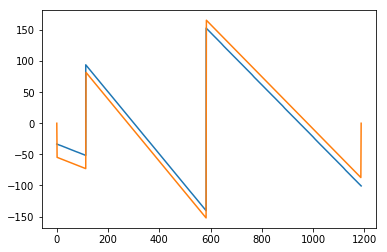

In [15]:
plt.plot(x_ftool, shear_diagram_v47)
x, momentum = beam.getShearDiagram()
plt.plot(x, momentum)

In [24]:
x_array, momentum_diagram_1 = np.loadtxt(r"../tests/structural/momentum_diagram_1.txt").T
#x, momentum_diagram_1 = np.loadtxt(r"../tests/structural/momentum_diagram_1.txt").T

8392

In [12]:
for x in 

array([ 0.  ,  0.09,  0.19,  0.28,  0.38,  0.47,  0.56,  0.66,  0.75,
        0.85,  0.94,  1.04,  1.13,  1.13,  1.23,  1.33,  1.43,  1.53,
        1.63,  1.73,  1.83,  1.93,  2.03,  2.13,  2.23,  2.33,  2.43,
        2.53,  2.63,  2.73,  2.83,  2.93,  3.03,  3.13,  3.23,  3.33,
        3.43,  3.53,  3.63,  3.73,  3.83,  3.93,  4.03,  4.13,  4.23,
        4.33,  4.43,  4.53,  4.63,  4.73,  4.83,  4.93,  5.03,  5.13,
        5.23,  5.33,  5.43,  5.53,  5.63,  5.73,  5.83,  5.83,  5.93,
        6.03,  6.13,  6.23,  6.33,  6.43,  6.52,  6.62,  6.72,  6.82,
        6.92,  7.02,  7.12,  7.22,  7.32,  7.42,  7.52,  7.62,  7.71,
        7.81,  7.91,  8.01,  8.11,  8.21,  8.31,  8.41,  8.51,  8.61,
        8.71,  8.81,  8.9 ,  9.  ,  9.1 ,  9.2 ,  9.3 ,  9.4 ,  9.5 ,
        9.6 ,  9.7 ,  9.8 ,  9.9 , 10.  , 10.09, 10.19, 10.29, 10.39,
       10.49, 10.59, 10.69, 10.79, 10.89, 10.99, 11.09, 11.19, 11.28,
       11.38, 11.48, 11.58, 11.68, 11.78, 11.88])

In [3]:
x = 113
beam.getInternalShearStrength(x), beam.getInternalMomentumStrength(x)

(-72.94936128392622, -7207.711925083664)

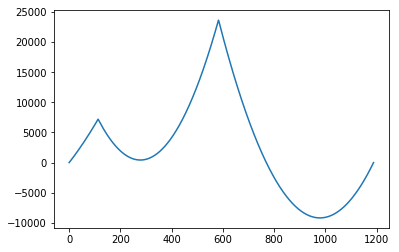

In [16]:
x, m = beam.getMomentumDiagram()
plt.plot(x, -m)

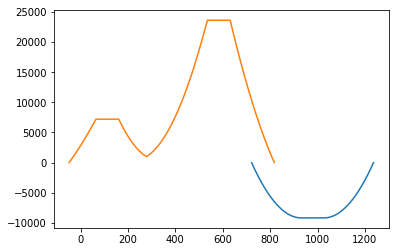

In [5]:
x_decalaged, momentum_positive, momentum_negative = beam.getDecalagedMomentumDiagram()
plt.plot(x_decalaged, -momentum_positive)
plt.plot(x_decalaged, -momentum_negative)
#x, y = beam.getShearDiagram()
#plt.plot(x, y)

In [6]:
self = beam

x_decalaged, momentum_positive, momentum_negative = self.getDecalagedMomentumDiagram()
positive_areas = [self.getSteelArea(x, m) for x, m in zip(x_decalaged, momentum_positive)]
#negative_areas = [self.getSteelArea(x, m) for x, m in zip(x_decalaged, momentum_negative)]

In [7]:
x=300
index = np.where(
            np.array([node.x for node in self.bars.nodes]) <= x)[0][-1]
print(index)
bar_element = self.bars.bar_elements[index]

1


# Rascunho

In [9]:
x, necessary_area = beam.getSteelAreaDiagram()
x, y = beam.getComercialSteelAreaDiagram()
number_of_bars = np.array(y)[:,0]
bar_diameter = np.array(y)[:,1]
comercial_area = np.array(y)[:,2]

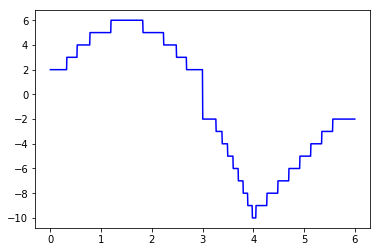

In [14]:
fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()
#ax1.plot(x, comercial_area, 'g-')
ax1.plot(x, number_of_bars, 'b-')
plt.show()

In [70]:
bar_removal = number_of_bars.copy()
for number in np.unique(number_of_bars):
    bar_removal = np.vstack([bar_removal, number*(number_of_bars==number)])
bar_removal = bar_removal[1:]

In [81]:
bar_removal = np.where(bar_removal==0, np.nan, bar_removal)

In [89]:
bar_removal

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

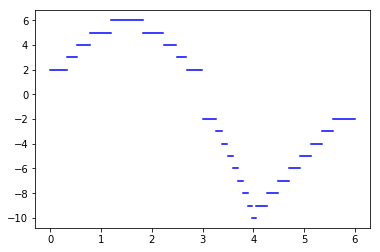

In [88]:
for bar in bar_removal:
    plt.plot(x, bar, 'b')
    
plt.show()

In [57]:
a = np.array([1, 2, 4])
a1 = np.vstack([a, [5,6,6]])
a2 = np.vstack([a1, [5,6,6]])

In [55]:
a2

array([[1, 2, 4],
       [5, 6, 6],
       [5, 6, 6]])

In [35]:
np.array([np.array([[1,2,3],[4,5,6]]),np.array([5,7,8])])

array([array([[1, 2, 3],
       [4, 5, 6]]), array([5, 7, 8])], dtype=object)

In [55]:
x, necessary_area = beam.getSteelAreaDiagram()
x, y = beam.getComercialSteelAreaDiagram()
number_of_bars = np.array(y)[:,0]
bar_diameter = np.array(y)[:,1]
comercial_area = np.array(y)[:,2]

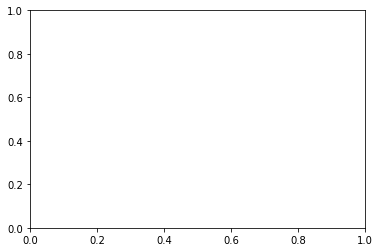

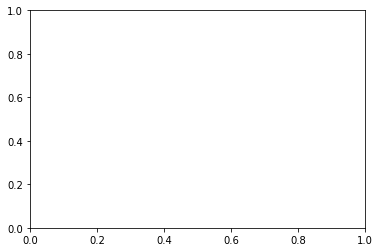

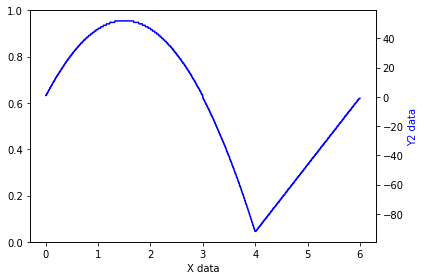

In [69]:
plt.cla()
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
#ax1.plot(x, comercial_area, 'g-')
ax2.plot(x, number_of_bars, 'b-')

ax1.set_xlabel('X data')
#ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [7]:
gapminder_us = gapminder[gapminder.country=="United States"]

Text(0,0.5,'Y2 data')

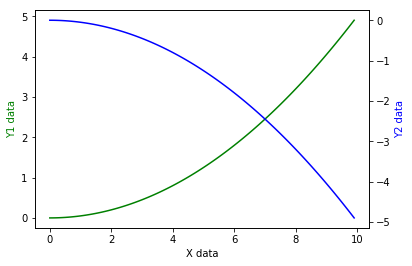

In [49]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 10, 0.1)
y1 = 0.05 * x**2
y2 = -1 *y1

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

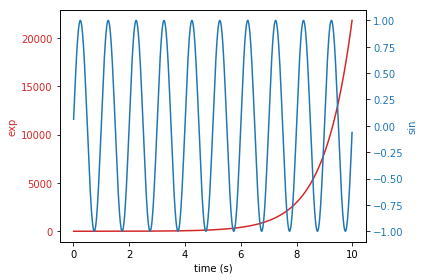

In [67]:
import matplotlib.pyplot as plt

# Create some mock data
t = np.arange(0.01, 10.0, 0.01)
data1 = np.exp(t)
data2 = np.sin(2 * np.pi * t)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
